In [10]:
import numpy as np
from sympy import *
from sympy.physics.mechanics import *
init_vprinting()

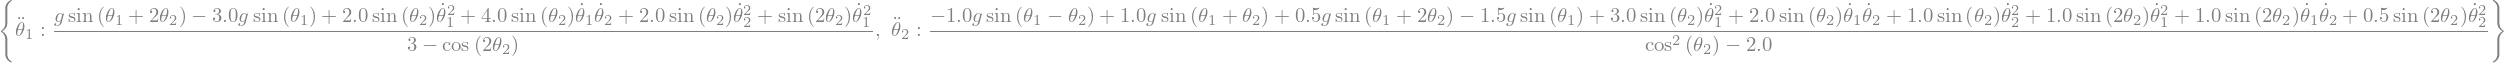

In [11]:
# define our symbolic variables
m1, m2, L1, L2, g, t = symbols('m1 m2 L1 L2 g t')

# optional: set the values of the constants
m1 = 1
m2 = 1
L1 = 1
L2 = 1

# dynamic symbols have implicit dependence on time
theta1, theta2 = dynamicsymbols('theta1 theta2')
theta1_dot = diff(theta1, t)
theta1_ddot = diff(theta1_dot, t)
theta2_dot = diff(theta2, t)
theta2_ddot = diff(theta2_dot, t)

# define coordinate transforms
Tsa = np.array([[cos(theta1), -sin(theta1), L1*sin(theta1)],
          [sin(theta1), cos(theta1), -L1*cos(theta1)],
          [0, 0, 1]])
Tab = np.array([[cos(theta2), -sin(theta2), L2*sin(theta2)],
          [sin(theta2), cos(theta2), -L2*cos(theta2)],
          [0, 0, 1]])
Tsb = Tsa @ Tab

# write p1, p2 in world frame
p1 = Tsa @ np.array([0,0,1])
p2 = Tsb @ np.array([0,0,1])

# get the velocities
v1 = np.array([diff(p1[0],t), diff(p1[1],t)])
v2 = np.array([diff(p2[0],t), diff(p2[1],t)])

# total kinetic energy
T = 0.5*m1*(v1.T @ v1) + 0.5*m2*(v2.T @ v2)

# total potential energy
V = m1*g*p1[1] + m2*g*p2[1]

# Lagrangian
L = T - V
L = simplify(L) # failure to simplify often may result in no solution

# solve the Euler-Lagrange Equations
eqn_1 = diff( diff(L,theta1_dot), t) - diff(L, theta1)
eqn_2 = diff( diff(L,theta2_dot), t) - diff(L, theta2)
eqn_1 = simplify(eqn_1)
eqn_2 = simplify(eqn_2)
sln = solve([eqn_1, eqn_2], [theta1_ddot,theta2_ddot])

sln[theta1_ddot] = simplify(sln[theta1_ddot])
sln[theta2_ddot] = simplify(sln[theta2_ddot])

sln

In [14]:
# make it easy to copy and paste into a python script
g = Matrix([sln[theta1_ddot], sln[theta2_ddot]]).subs({theta1: 'theta1', theta1_dot: 'theta1_dot',theta2: 'theta2', theta2_dot: 'theta2_dot'})
print(f'theta1_ddot = {g[0]}'.replace('sin', 'np.sin').replace('cos', 'np.cos'))
print(f'theta2_ddot = {g[1]}'.replace('sin', 'np.sin').replace('cos', 'np.cos'))
print()

theta1_ddot = (-3.0*g*np.sin(theta1) + g*np.sin(theta1 + 2*theta2) + 2.0*theta1_dot**2*np.sin(theta2) + theta1_dot**2*np.sin(2*theta2) + 4.0*theta1_dot*theta2_dot*np.sin(theta2) + 2.0*theta2_dot**2*np.sin(theta2))/(3 - np.cos(2*theta2))
theta2_ddot = (-1.5*g*np.sin(theta1) - 1.0*g*np.sin(theta1 - theta2) + 1.0*g*np.sin(theta1 + theta2) + 0.5*g*np.sin(theta1 + 2*theta2) + 3.0*theta1_dot**2*np.sin(theta2) + 1.0*theta1_dot**2*np.sin(2*theta2) + 2.0*theta1_dot*theta2_dot*np.sin(theta2) + 1.0*theta1_dot*theta2_dot*np.sin(2*theta2) + 1.0*theta2_dot**2*np.sin(theta2) + 0.5*theta2_dot**2*np.sin(2*theta2))/(np.cos(theta2)**2 - 2.0)

